# Back -Orders

### Domain Introduction:

Material backorder is a common supply chain problem,impacting an inventory system service level and effectiveness. Identifying parts with the highest chances of shortage prior its occurrence can present a high opportunity to improve an overall company’s performance. In this datatale machine learning classiﬁers are investigated in order to propose a predictive model for this  imbalanced class problem, where the relative frequency of items that goes into backorder is rare when compared to items that do not.

Most of the approaches proposed so far formulate the problem as a multi-objective optimization one: ordering and storages costs must be held to a minimum, while service level is leverage as higher as possible. 
A different approach for managing the inventory more efﬁciently - and complementary to the models developed in literature - is to identify the materials at risk of backorder before the event occurs, conferring the business a suitable time to react.

If back orders not handled carefully, we are in the verge of not only losing customers and business but also land up getting a bad reputation. In short it is a very delicate line between, having the right items in the right quantity at the right time to avoid 'No stock' situation and at the same time not spending much unnecessarily on the storage costs

### Problem Statement

We have a dataset which has a lot of information regarding the previous month sales, sales forcast for 3, 6 and 9 months along with parts that went on back orders.

1) To indetify reason behind a part going for back order.

2) Features that contribute for the part to go back orders.

3) Items that need not be stocked and item that needed to be stock.

4) How to efficiently manage an inventory system.


### Data Description

national_inv: Current inventory level of components. 

lead_time:  Registered transit time

in_transit_qty:  In transit Quantity

forecast_3_month:  Sales forcast for  next 3 months

forecast_6_month:  Sales forcast for next 6 months

forecast_9_month:  Sales forcast for next 9 months

sales_1_month:   Previous 1 month sales quantity.

sales_3_month:  Previous 3 month sales quantity.

sales_6_month:  Previous 6 month sales quantity 

sales_9_month:  Previous 9 month sales quantity

min_bank:   Minimum recommended amount in stock.

potential_issue: Source issue for part identified

pieces_past_due:  Parts Over due from source

perf_6_month_avg:  Source performance in last 6 months

perf_12_month_avg: Source performance in last 12 months

local_bo_qty: Amount of stock orders overdue

deck_risk: Part risk flag

oe_constraint:  Part risk flag

ppap_risk: Production Part Approval processes risk flag

stop_auto_buy:  Part risk flag

rev_stop:  Part risk flag

went_on_backorder:  Part risk flag




#### Target Variable:
went on back orders- this is our target varaible. 
yes- the product went on back orders.
No- the product did not go on backorder

Step: 1 Import important libraries and reading the file

In [48]:
import pandas as pd   #data processing
import numpy as np    #linear algebra
import matplotlib.pyplot as plt   #data visualization
%matplotlib inline
import seaborn as sns

In [49]:
back=pd.read_csv('D:\\datas\\block-masters\\BackOrders.csv')  #reading the csv dataset

Step: 2 Data Inspection

In [50]:
back.shape #checking the shape of the dataset

(61589, 23)

In [51]:
pd.set_option('display.max_columns',25)   # setting the maximum column to display
back.head(20)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,15,1,No,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,0,0,No,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,365,47,No,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,9,1,No,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,6,0,No,0,0.97,0.92,0,No,No,No,Yes,No,No
5,3002608,297,12.0,0,0,0,0,5,6,44,57,3,No,0,0.58,0.75,0,Yes,No,No,Yes,No,No
6,1707693,3285,8.0,0,0,0,0,18,81,162,304,37,No,0,0.61,0.57,0,No,No,No,Yes,No,No
7,2066128,6,2.0,0,0,3,9,1,5,8,13,0,No,0,0.86,0.77,0,No,No,No,Yes,No,Yes
8,3174990,99,8.0,0,46,169,225,2,22,176,263,21,No,0,0.11,0.37,0,No,No,No,Yes,No,No
9,3021709,52,2.0,0,0,0,0,0,0,0,0,0,No,0,0.83,0.69,0,No,No,No,Yes,No,No


In [52]:
back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61589 entries, 0 to 61588
Data columns (total 23 columns):
sku                  61589 non-null int64
national_inv         61589 non-null int64
lead_time            58186 non-null float64
in_transit_qty       61589 non-null int64
forecast_3_month     61589 non-null int64
forecast_6_month     61589 non-null int64
forecast_9_month     61589 non-null int64
sales_1_month        61589 non-null int64
sales_3_month        61589 non-null int64
sales_6_month        61589 non-null int64
sales_9_month        61589 non-null int64
min_bank             61589 non-null int64
potential_issue      61589 non-null object
pieces_past_due      61589 non-null int64
perf_6_month_avg     61589 non-null float64
perf_12_month_avg    61589 non-null float64
local_bo_qty         61589 non-null int64
deck_risk            61589 non-null object
oe_constraint        61589 non-null object
ppap_risk            61589 non-null object
stop_auto_buy        61589 non-null objec

from the above table we can see that the Data types are int, float and object. Variables that are having object dtypes are actually categorical in nature

In [53]:
back.describe().T   #feature description for continiuous variables

,count,mean,std,min,25%,50%,75%,max
sku,61589.0,2.037188e+06,656417.815448,1068628.0,1498574.00,1898033.00,2314826.00,3284895.0
national_inv,61589.0,2.877219e+02,4233.906931,-2999.0,3.00,10.00,57.00,673445.0
lead_time,58186.0,7.559619e+00,6.498952,0.0,4.00,8.00,8.00,52.0
in_transit_qty,61589.0,3.019284e+01,792.869253,0.0,0.00,0.00,0.00,170976.0
forecast_3_month,61589.0,1.692728e+02,5286.742232,0.0,0.00,0.00,12.00,1126656.0
forecast_6_month,61589.0,3.150413e+02,9774.362076,0.0,0.00,0.00,25.00,2094336.0
forecast_9_month,61589.0,4.535760e+02,14202.007981,0.0,0.00,0.00,36.00,3062016.0
sales_1_month,61589.0,4.474296e+01,1373.805831,0.0,0.00,0.00,6.00,295197.0
sales_3_month,61589.0,1.507326e+02,5224.959649,0.0,0.00,2.00,17.00,934593.0
sales_6_month,61589.0,2.835465e+02,8872.269640,0.0,0.00,4.00,34.00,1799099.0


In the continious variable description, We can see that variable lead_time has soome missing values. 
some features like in_trabsit_qty, forcast_3_months,forcast_6_months, forcast_9_months sales-1,3,6,9 months having out liers. detailed investigation is required in order to deal with the outliers and take necessary actions.
Let us now deal with the lead_time missing values

In [54]:
back.describe(include='object')   # description in the categorical variables

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,61589,61589,61589,61589,61589,61589,61589
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,61509,48145,61577,53792,59303,61569,50296


### Missing values- manipulation

In [55]:
back.isnull().sum()

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

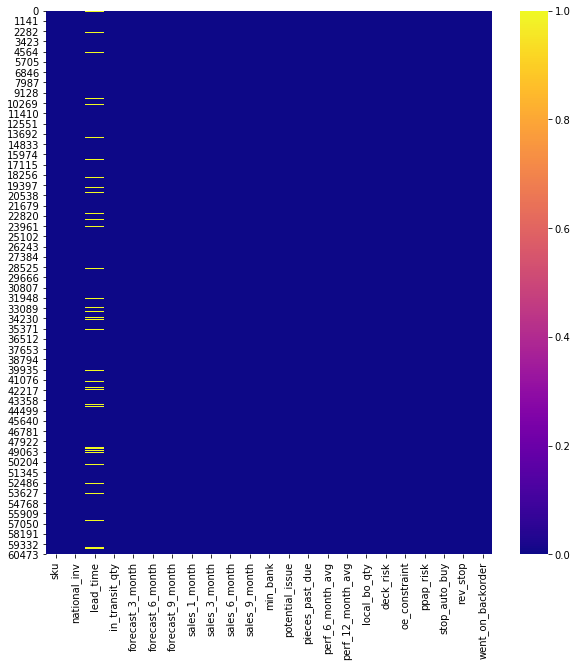

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(back.isnull(), xticklabels=back.columns, cmap='plasma')
plt.show()

We notics that only lead_time variable has missing values, lets look into it deeper

In [57]:
print (' total no. of missing values in lead_time variable:', back['lead_time'].isnull().sum() )
percent=round((back['lead_time'].isnull().sum()/back['lead_time'].isnull().count())*100,2)
print (' % of missing values in the in lead_time :', percent,'%')

 total no. of missing values in lead_time variable: 3403
 % of missing values in the in lead_time : 5.53 %


In [58]:
back['lead_time'].unique()

array([nan,  2., 15., 12.,  8.,  9.,  4., 10., 16., 52.,  0.,  6., 14.,
        5., 17.,  3., 30., 13., 11., 24., 18., 20.,  7.,  1., 22., 40.,
       26., 35., 28.])

We see that only lead_time has '3403' missing values which contributes to 5.53% of missing information for the variables.
from the unique values we can clearly see that its int by nature. So, We use the median of the varibles to fill the 'NAN' values

In [59]:
back['lead_time']=back['lead_time'].fillna(back['lead_time'].median())  # fill the nan values with median of the column

### Out Lier Analysis

Lets check for out liers in the dataset

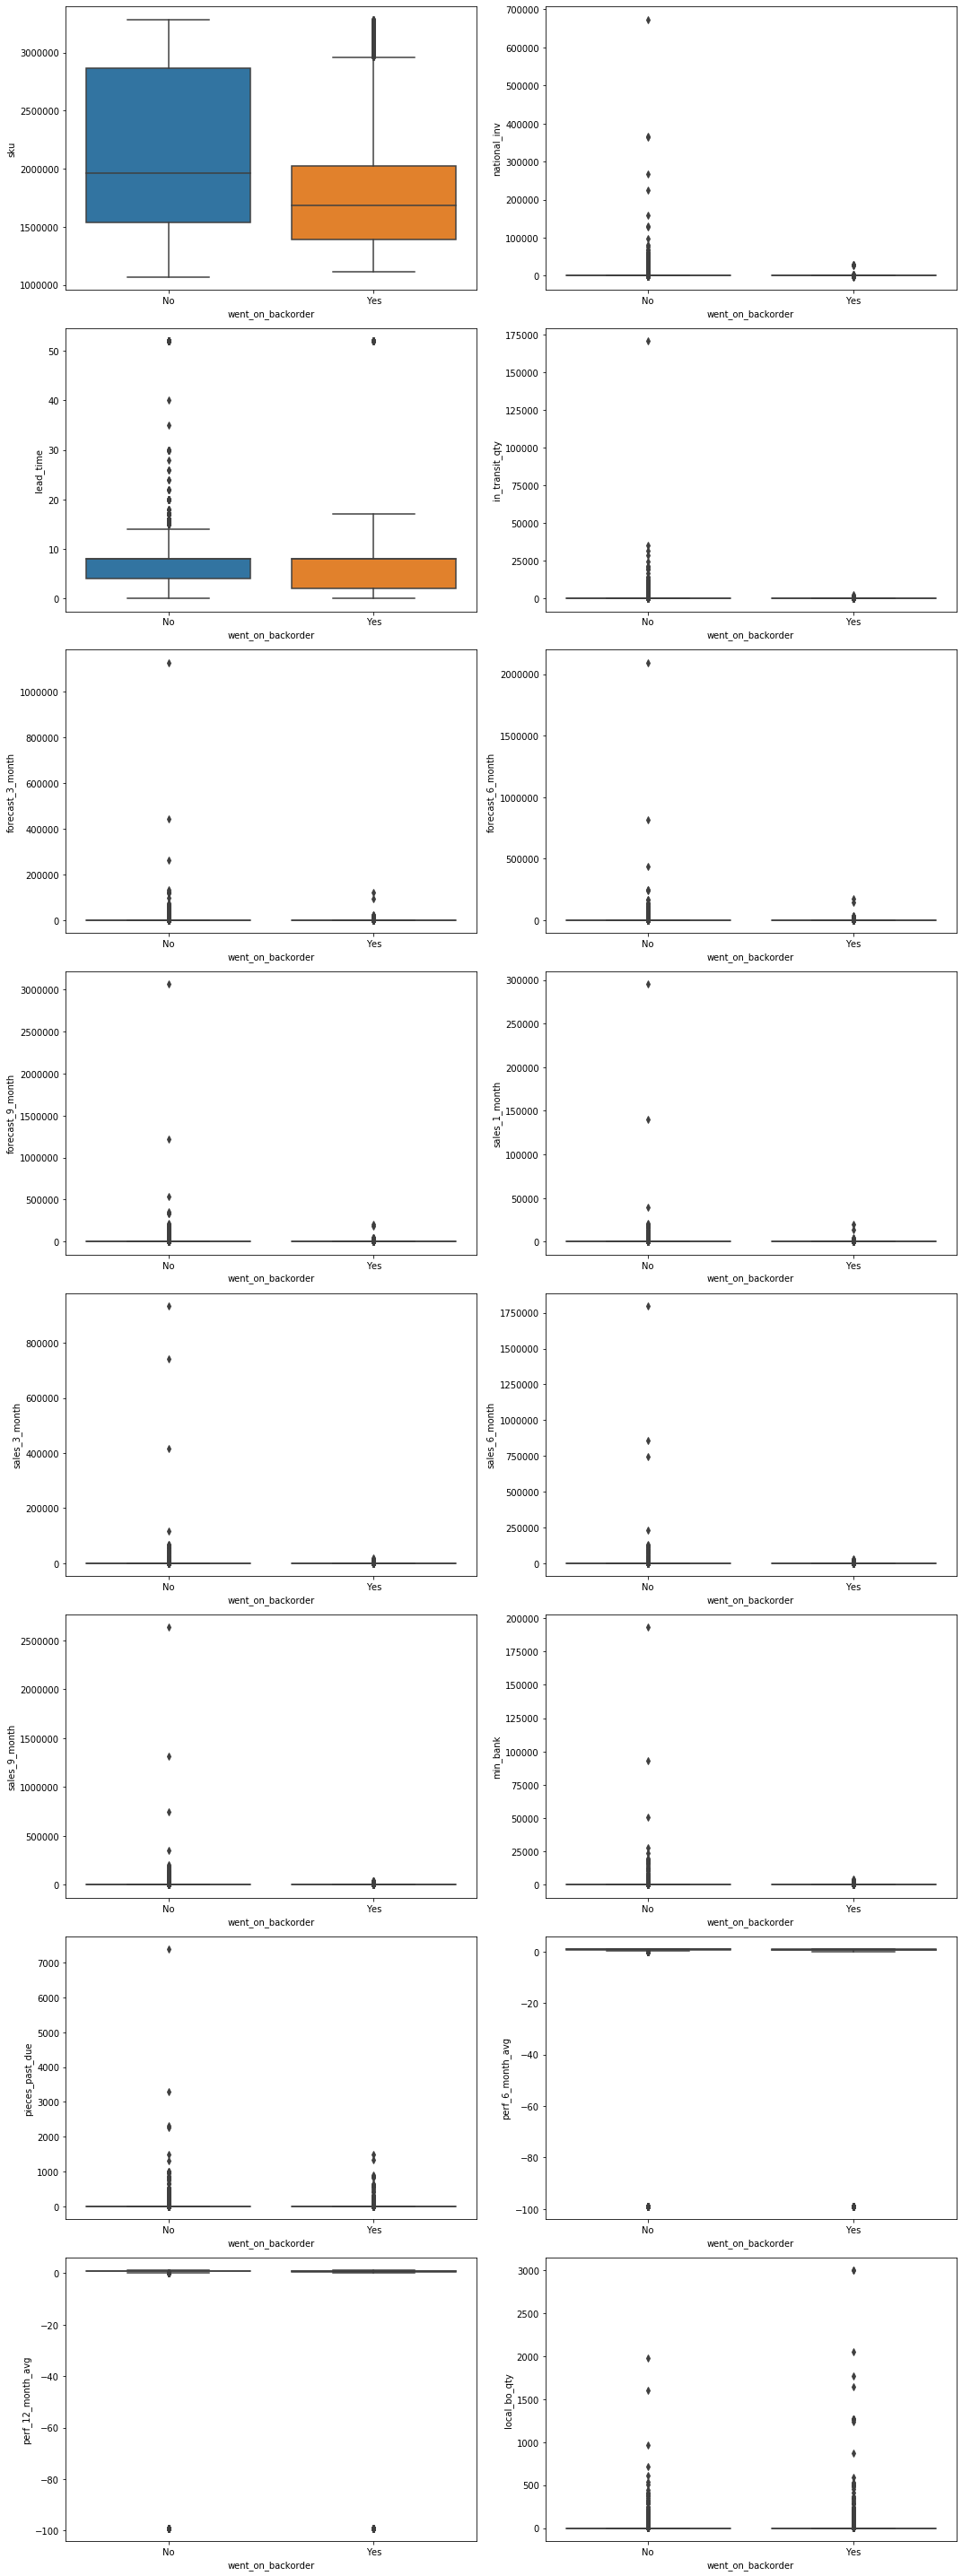

In [60]:
num_cols=[]
plt.figure(figsize=(15,40))
n=1
for col in back.select_dtypes(('float64', 'int64')):
    plt.subplot(8,2,n)
    sns.boxplot(x=back['went_on_backorder'], y=back[col])
    n=n+1
    plt.tight_layout()
    num_cols.append(col)
plt.show()

in_transit_qty: We see a outlier in transit quantity which was not back order
forecast_3_month, forecast_6_month,forecast_9_month: shows outliers which has been steadly increased between 3- month , 6- month and 9-months so we can call it as business outliers.
sales_1_month, sales_3_month, sales_6_month, sales_6_month: supports the obove statement of business outliers, the forcast matched the sale amount.

let us not try fixing the outlier now. We will get back her incase we face any model accuracy issue while fitting theam 

## Exploratory data analysis- Part 1

Uni-variate Analysis- Target

In [61]:
size=[back.went_on_backorder[back['went_on_backorder']=='No'].count(), back.went_on_backorder[back['went_on_backorder']=='Yes'].count()]
label=['No_Back_orders', 'Back_orders']

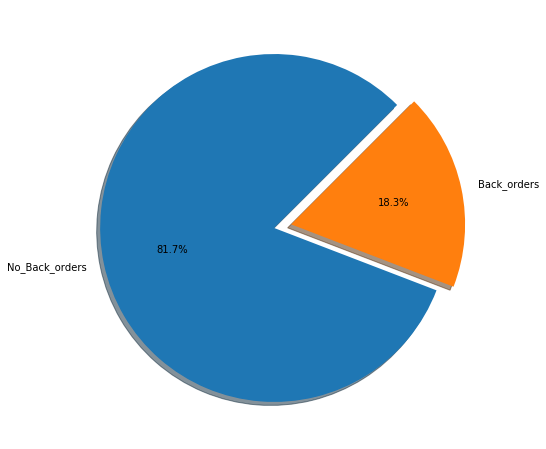

In [62]:
plt.figure(figsize=(8,8))
plt.pie(size, labels=label, explode=(0.1,0), autopct='%1.1f%%', shadow=True, startangle=45)
plt.show()

from the above pie chart it is very clear that, 18.3% have gone for back order. 81.7% didnt go for back order. We also see a class imbalace problem here with a ratio of approc 80:20. The class which is of our interest to study forms minority here. There a measure to handle the imbalanced dataset we will deal with this in a while

Univariate analysis: categorical variables

Lets analyse and understand the behaviour of each categorical variable by visualizing 

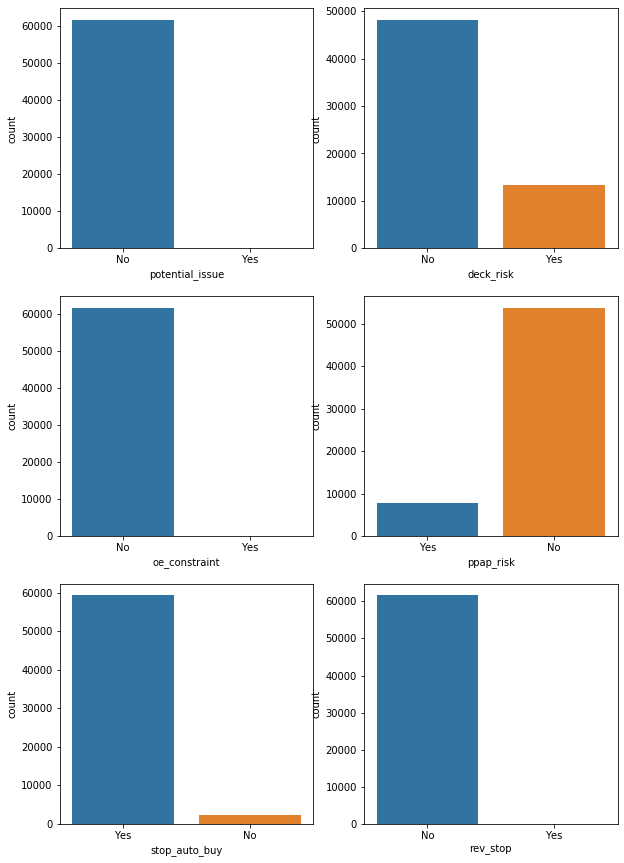

In [63]:
plt.figure(figsize=(10,15))
n=1
for col in back.select_dtypes('object'):
    if col!='went_on_backorder':
        plt.subplot(3,2,n)
        sns.countplot(x=col, data=back)
        n=n+1
        back[col]=back[col].astype('category')
plt.show()

We notice that most of the orders doesn't face potential issue, oe_constraint, rev_stop. We can see that around 15-18K orders have deck risk, 8000 products have ppap_risk. Auto buying option is disabled for almost 60k products, Now this can be to manage low cost inventory, but we also have to make sure that product which are on high demand have auto buying mode enabled which will make sure the product is in stock thus avoiding back orders.  

Uni- variate: numerical 

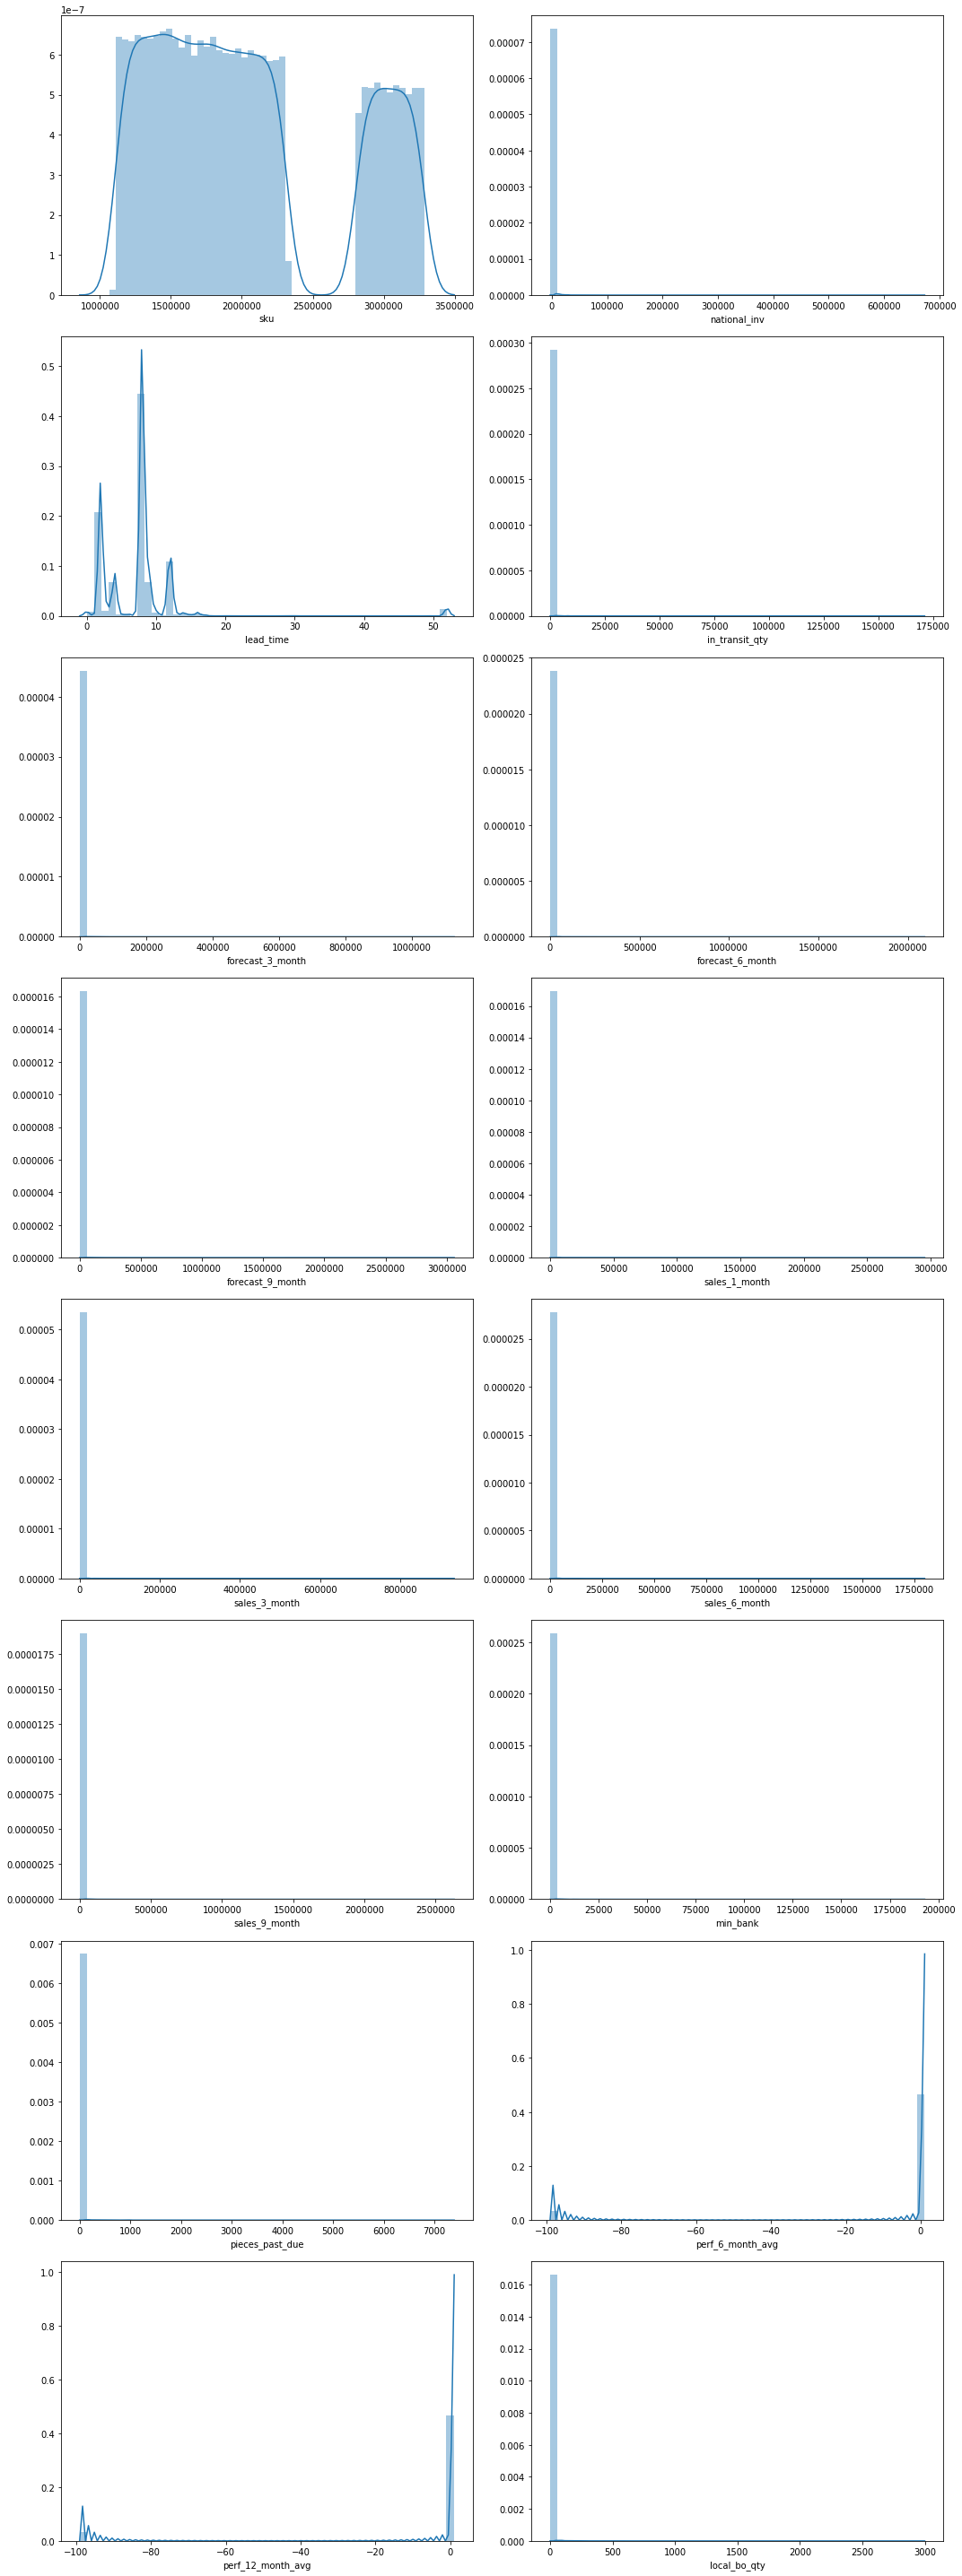

In [47]:
plt.figure(figsize=(15,40))
n=1
for col in back.select_dtypes(('float64', 'int64')):
    plt.subplot(8,2,n)
    sns.distplot(back[col])
    n=n+1
    plt.tight_layout()
plt.show()

We can see that variables like national_inv, in_transit_qty, forecast, sales, min_bank are all highly skewed towards right. this means the mean is greater than the mode. we also see high correlation and also overlapping between the sales and the forcast. This means sales have happened as per the forecast. after some detailed investigation we might need to drop some highly correlated features to avoide model bias

perf_6_month_avg, perf_12_month_avg are skewed towards left this means the mean is lower that the mode. 

### Exploratory Data Analysis- part II

Bi-variate Analysis

Now lets us visualize and see how variables tends to behave with respect to the target variables. This EDA helps us to understand our dataset even better and helps us to draw some better conclusions

In [64]:
back['sku'].nunique()

61589

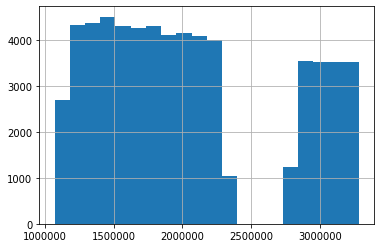

In [65]:
back['sku'].hist(bins=20)

We notice 'sku' is a variable with random no. with high cardinality. We also see that the no. of unique values is equal to the total. no. of obeservation. This means that sku is part no. or serial no. 

Correlation: Lets see the correlation between the continious variable

In [68]:
corr=abs(back.corr())

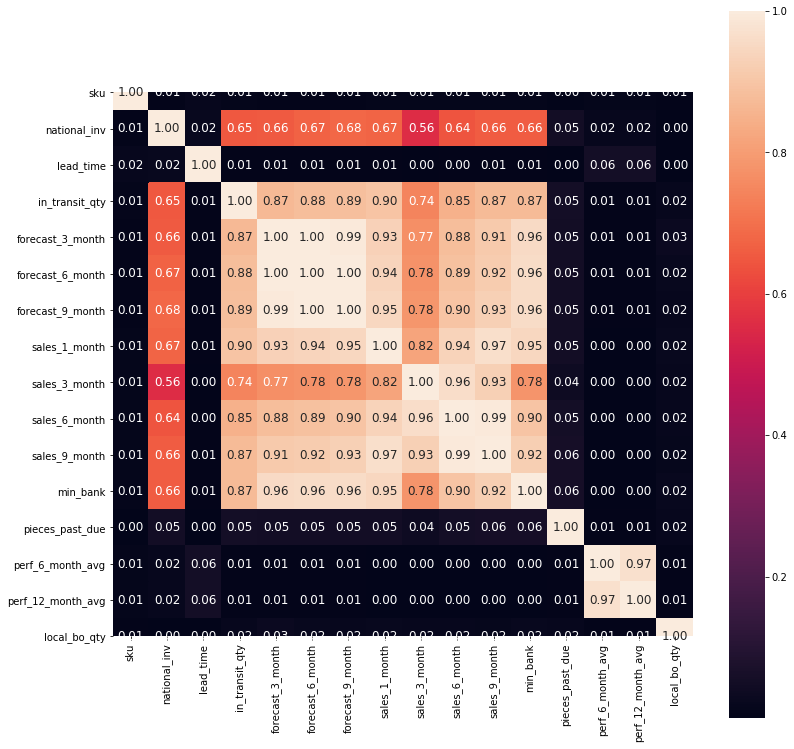

In [78]:
plt.figure(figsize=(13,13))
sns.heatmap(corr, square=True, annot=True, annot_kws={"size": 12}, fmt=".2f")

from the above heatmap we can see that there is overlap between forecast_6_months and forecast_9_months and between forecast_6_months and forecast_3_months-- this means, that sales between 6 and 9 months are same. sale between 3 and 6 months have a small but negligible difference.
there is also significant correlation between min_bank and forecast 3,6,9 months.-- this means, min_bank are assigned foreseeing the sales forecast which is beign anticipated. 
We also notice a high correlation between sales_6_months and sales_3_months, sale_9_months- sales_1_month and sales_6_months are highly correlated. This mean the sales are not seasonal- the sales are constant through all quater of the year.
source performance for 6 months and source performance 12 months show good correlation score-- this means, that the performance of the source is same through the year